In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import inspect, create_engine

In [4]:
HOSTNAME = "localhost"
PORT = 5432
DATABASE = "sql_hw"
USERNAME = "postgres"
PASSWORD = "password"

path = f'postgresql+psycopg2://{USERNAME}:{PASSWORD}@{HOSTNAME}:{PORT}/{DATABASE}'
engine = create_engine(path)

In [5]:
inspector = inspect(engine)

for table in inspector.get_table_names():
    columns = inspector.get_columns(table)
    print(table)
    print()
    for column in columns:
        print(column["name"], column["type"])
    
    # or put it as a dataframe
    display(pd.DataFrame(columns))
    
    print()

titles

ID INTEGER
title_id VARCHAR(10)
title VARCHAR(50)
last_updated TIMESTAMP WITHOUT TIME ZONE


,name,type,nullable,default,autoincrement,comment
0,ID,INTEGER,False,"nextval('""titles_ID_seq""'::regclass)",True,None
1,title_id,VARCHAR(10),False,None,False,None
2,title,VARCHAR(50),True,None,False,None
3,last_updated,TIMESTAMP WITHOUT TIME ZONE,False,LOCALTIMESTAMP,False,None



employees

ID INTEGER
emp_no INTEGER
emp_title_id VARCHAR(10)
birth_date DATE
first_name VARCHAR(100)
last_name VARCHAR(100)
gender VARCHAR(1)
hire_date DATE
last_updated TIMESTAMP WITHOUT TIME ZONE


,name,type,nullable,default,autoincrement,comment
0,ID,INTEGER,False,"nextval('""employees_ID_seq""'::regclass)",True,None
1,emp_no,INTEGER,False,None,False,None
2,emp_title_id,VARCHAR(10),False,None,False,None
3,birth_date,DATE,True,None,False,None
4,first_name,VARCHAR(100),True,None,False,None
5,last_name,VARCHAR(100),True,None,False,None
6,gender,VARCHAR(1),True,None,False,None
7,hire_date,DATE,True,None,False,None
8,last_updated,TIMESTAMP WITHOUT TIME ZONE,False,LOCALTIMESTAMP,False,None



departments

ID INTEGER
dept_no VARCHAR(10)
dept_name VARCHAR(50)
last_updated TIMESTAMP WITHOUT TIME ZONE


,name,type,nullable,default,autoincrement,comment
0,ID,INTEGER,False,"nextval('""departments_ID_seq""'::regclass)",True,None
1,dept_no,VARCHAR(10),False,None,False,None
2,dept_name,VARCHAR(50),True,None,False,None
3,last_updated,TIMESTAMP WITHOUT TIME ZONE,False,LOCALTIMESTAMP,False,None



dept_manager

ID INTEGER
dept_no VARCHAR(10)
emp_no INTEGER
last_updated TIMESTAMP WITHOUT TIME ZONE


,name,type,nullable,default,autoincrement,comment
0,ID,INTEGER,False,"nextval('""dept_manager_ID_seq""'::regclass)",True,None
1,dept_no,VARCHAR(10),False,None,False,None
2,emp_no,INTEGER,False,None,False,None
3,last_updated,TIMESTAMP WITHOUT TIME ZONE,False,LOCALTIMESTAMP,False,None



salaries

ID INTEGER
emp_no INTEGER
salary INTEGER
last_updated TIMESTAMP WITHOUT TIME ZONE


,name,type,nullable,default,autoincrement,comment
0,ID,INTEGER,False,"nextval('""salaries_ID_seq""'::regclass)",True,None
1,emp_no,INTEGER,False,None,False,None
2,salary,INTEGER,True,None,False,None
3,last_updated,TIMESTAMP WITHOUT TIME ZONE,False,LOCALTIMESTAMP,False,None



dept_emp

ID INTEGER
emp_no INTEGER
dept_no VARCHAR(10)
last_updated TIMESTAMP WITHOUT TIME ZONE


,name,type,nullable,default,autoincrement,comment
0,ID,INTEGER,False,"nextval('""dept_emp_ID_seq""'::regclass)",True,None
1,emp_no,INTEGER,False,None,False,None
2,dept_no,VARCHAR(10),False,None,False,None
3,last_updated,TIMESTAMP WITHOUT TIME ZONE,False,LOCALTIMESTAMP,False,None


In [6]:
query = """
        SELECT
            t.title,
            avg(s.salary) as avg_salary
        FROM
            employees e
            join salaries s on e.emp_no = s.emp_no
            join titles t on e.emp_title_id = t.title_id
        group by
            t.title
        order by
            avg_salary desc
        """

conn = engine.connect()

df = pd.read_sql(query, conn)
df.head()

,title,avg_salary
0,Senior Staff,58550.172704
1,Staff,58465.382850
2,Manager,51531.041667
3,Technique Leader,48582.896092
4,Assistant Engineer,48564.434447


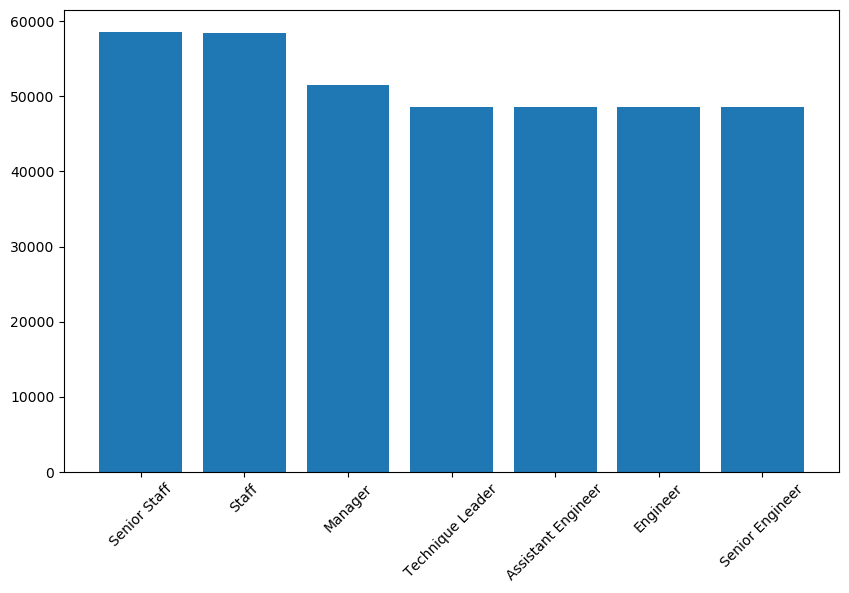

In [12]:
plt.figure(figsize=(10,6))
plt.bar(df.title, df.avg_salary)
plt.xticks(rotation=45)
plt.show()

In [13]:
conn.close()
engine.dispose()